<a href="https://colab.research.google.com/github/TommasoBuoso/spam_filter/blob/main/AI_assignment2_Buoso_Tommaso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

In [182]:
!pip install sklearn

In [183]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import math
import time
import pandas as pd
import seaborn as sb

In [184]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [185]:
spambase = np.genfromtxt('/gdrive/My Drive/IA1/spambase/spambase.data', delimiter=',')

In [186]:
df = pd.read_csv('/gdrive/My Drive/IA1/spambase/spambase.data', header=None, delimiter = ",")

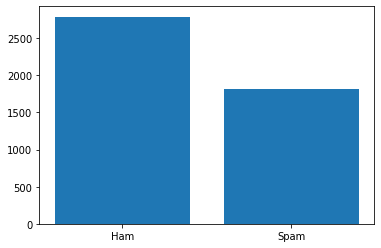

In [187]:
fig1, ax1 = plt.subplots()
labels = ["Ham", "Spam"]
dt = [len(df[df[57] == 0]), len(df[df[57] == 1])]
         
ax1.bar(labels, dt)
ax1.set_xticks(labels, minor=False)

plt.show()

In [188]:
#delete entry with all features equal to 0
idx = []
for i in range(len(spambase)):
  if not(False in (spambase[i][:-4] == 0)):
    idx.append(i)
spambase = np.delete(spambase, idx, 0)

label = np.asarray(copy.deepcopy([i[-1] for i in spambase]))
spambase = np.delete(spambase, np.s_[-4:], 1)
results = []

### TF-IDF COMPUTATION

In [189]:
N = len(spambase)

df = np.zeros(len(spambase[0]))
for i in spambase:
  df[i > 0] += 1 
print(df)

w = copy.deepcopy(spambase)
for j in range(len(spambase)):
  for i in range(len(spambase[j])):
    w[j][i] = (spambase[j][i] / 100) * np.log(N/df[i])

[1053.  898. 1888.   47. 1748.  999.  807.  824.  773. 1302.  709. 2325.
  852.  357.  336. 1241.  963. 1038. 3227.  424. 2423.  117.  679.  735.
 1090.  811.  780.  463.  372.  469.  293.  205.  405.  215.  485.  599.
  829.   83.  384.  453.  148.  341.  375.  327. 1311.  517.   63.  203.
  790. 2715.  529. 2258. 1400.  750.]


In [190]:
w_angular = [i / np.sum(i) for i in w] #angular kernel
w_angular = np.nan_to_num(w_angular)

# SVM

## Linear kernel

### With lenght information

In [191]:
from sklearn import svm, model_selection, metrics

X_train, X_test, y_train, y_test = model_selection.train_test_split(w, label, test_size = 0.33, random_state = 2)

In [192]:
clf = svm.SVC(kernel = "linear")

start_time = time.time()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Single model and single prediction time:", time.time() - start_time,"seconds")
print("Number of support vectors used =", clf.n_support_)

Single model and single prediction time: 0.6917760372161865 seconds
Number of support vectors used = [1192 1189]


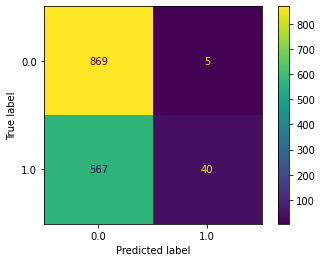

In [193]:
metrics.plot_confusion_matrix(clf, X_test, y_test, values_format = '')  
plt.show()

In [194]:
print(metrics.classification_report(y_true=y_test, y_pred = y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.99      0.75       874
         1.0       0.89      0.07      0.12       607

    accuracy                           0.61      1481
   macro avg       0.75      0.53      0.44      1481
weighted avg       0.72      0.61      0.49      1481



In [195]:
clf = svm.SVC(kernel = "linear")

start_time = time.time()
res = np.mean(model_selection.cross_val_score(clf, w, label, cv = 10))
results.append([res, "LIN", time.time() - start_time])

In [196]:
res = model_selection.cross_validate(clf, w, label, scoring = ["accuracy", "precision", "recall"], cv = 10)
print("10 WAY CROSS VALIDATION")
print('Mean accuracy =', np.mean(res['test_accuracy']))
print('Mean precision =', np.mean(res['test_precision']))
print('Mean recall =', np.mean(res['test_recall']))
print('Mean fit time =', np.mean(res['fit_time']))
print('Mean score time =', np.mean(res['score_time']))

10 WAY CROSS VALIDATION
Mean accuracy = 0.6645854875914732
Mean precision = 0.9521573483782786
Mean recall = 0.1803560466543892
Mean fit time = 0.8176743268966675
Mean score time = 0.07364311218261718


In [197]:
# SVM with an higher C parameter to make the classifier more stringent in the classification of outliers
clf = svm.SVC(kernel = "linear", C = 100)
res = model_selection.cross_validate(clf, w, label, scoring = ["accuracy", "precision", "recall"], cv = 10)
print("10 WAY CROSS VALIDATION")
print('Mean accuracy =', np.mean(res['test_accuracy']))
print('Mean precision =', np.mean(res['test_precision']))
print('Mean recall =', np.mean(res['test_recall']))
print('Mean fit time =', np.mean(res['fit_time']))
print('Mean score time =', np.mean(res['score_time']))

10 WAY CROSS VALIDATION
Mean accuracy = 0.9061535555202036
Mean precision = 0.8884467983487905
Mean recall = 0.882120933087784
Mean fit time = 0.3293712854385376
Mean score time = 0.03113706111907959


In [198]:
clf = svm.SVC(kernel = "linear", C = 100)
clf.fit(X_train, y_train)
print("Number of support vectors used =", clf.n_support_)

Number of support vectors used = [503 495]


### With angular information only

In [199]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(w_angular, label, test_size = 0.33, random_state = 2)

In [200]:
clf = svm.SVC(kernel = "linear")

start_time = time.time()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Single model and single prediction time:", time.time() - start_time,"seconds")
print("Number of support vectors used =", clf.n_support_)

Single model and single prediction time: 0.2979400157928467 seconds
Number of support vectors used = [468 454]


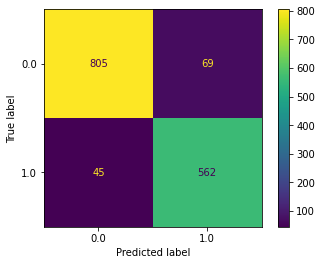

In [201]:
metrics.plot_confusion_matrix(clf, X_test, y_test, values_format = '')  
plt.show()

In [202]:
print(metrics.classification_report(y_true=y_test, y_pred = y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       874
         1.0       0.89      0.93      0.91       607

    accuracy                           0.92      1481
   macro avg       0.92      0.92      0.92      1481
weighted avg       0.92      0.92      0.92      1481



In [203]:
clf = svm.SVC(kernel = "linear")
start_time = time.time()
res = np.mean(model_selection.cross_val_score(clf, w_angular, label, cv = 10))
results.append([res, "LIN ANG", time.time() - start_time])

In [204]:
res = model_selection.cross_validate(clf, w_angular, label, scoring = ["accuracy", "precision", "recall"], cv = 10)
print("10 WAY CROSS VALIDATION")
print('Mean accuracy =', np.mean(res['test_accuracy']))
print('Mean precision =', np.mean(res['test_precision']))
print('Mean recall =', np.mean(res['test_recall']))
print('Mean fit time =', np.mean(res['fit_time']))
print('Mean score time =', np.mean(res['score_time']))

10 WAY CROSS VALIDATION
Mean accuracy = 0.9117204899777283
Mean precision = 0.8609267777996654
Mean recall = 0.9374340085942297
Mean fit time = 0.31704719066619874
Mean score time = 0.028865957260131837


In [205]:
# SVM with an higher C parameter to make the classifier more stringent in the classification of outliers
clf = svm.SVC(kernel = "linear", C = 100)
res = model_selection.cross_validate(clf, w_angular, label, scoring = ["accuracy", "precision", "recall"], cv = 10)
print("10 WAY CROSS VALIDATION")
print('Mean accuracy =', np.mean(res['test_accuracy']))
print('Mean precision =', np.mean(res['test_precision']))
print('Mean recall =', np.mean(res['test_recall']))
print('Mean fit time =', np.mean(res['fit_time']))
print('Mean score time =', np.mean(res['score_time']))

10 WAY CROSS VALIDATION
Mean accuracy = 0.9077130727012408
Mean precision = 0.8594018030738754
Mean recall = 0.9263750767341928
Mean fit time = 0.5822721004486084
Mean score time = 0.022287607192993164


## Polynomial kernel of degree 2

### With lenght information

In [206]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(w, label, test_size = 0.33, random_state = 2)
clf = svm.SVC(kernel = "poly", degree=2)

start_time = time.time()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Single model and single prediction time:", time.time() - start_time,"seconds")
print("Number of support vectors used =", clf.n_support_)

Single model and single prediction time: 0.6219799518585205 seconds
Number of support vectors used = [996 988]


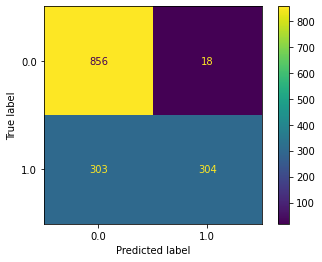

In [207]:
metrics.plot_confusion_matrix(clf, X_test, y_test, values_format = '')  
plt.show()

In [208]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.98      0.84       874
         1.0       0.94      0.50      0.65       607

    accuracy                           0.78      1481
   macro avg       0.84      0.74      0.75      1481
weighted avg       0.82      0.78      0.77      1481



In [209]:
clf = svm.SVC(kernel = "poly", degree=2)
start_time = time.time()
res = np.mean(model_selection.cross_val_score(clf, w, label, cv = 10))
results.append([res, "POLY", time.time() - start_time])

In [210]:
res = model_selection.cross_validate(clf, w, label, scoring = ["accuracy", "precision", "recall"], cv = 10)
print("10 WAY CROSS VALIDATION")
print('Mean accuracy =', np.mean(res['test_accuracy']))
print('Mean precision =', np.mean(res['test_precision']))
print('Mean recall =', np.mean(res['test_recall']))
print('Mean fit time =', np.mean(res['fit_time']))
print('Mean score time =', np.mean(res['score_time']))

10 WAY CROSS VALIDATION
Mean accuracy = 0.821264019249125
Mean precision = 0.9268691410327218
Mean recall = 0.6062400245549419
Mean fit time = 0.7140614032745362
Mean score time = 0.06366610527038574


In [211]:
# SVM with an higher C parameter to make the classifier more stringent in the classification of outliers
clf = svm.SVC(kernel = "poly", degree=2, C = 100)
res = model_selection.cross_validate(clf, w, label, scoring = ["accuracy", "precision", "recall"], cv = 10)
print("10 WAY CROSS VALIDATION")
print('Mean accuracy =', np.mean(res['test_accuracy']))
print('Mean precision =', np.mean(res['test_precision']))
print('Mean recall =', np.mean(res['test_recall']))
print('Mean fit time =', np.mean(res['fit_time']))
print('Mean score time =', np.mean(res['score_time']))

10 WAY CROSS VALIDATION
Mean accuracy = 0.9106158526885141
Mean precision = 0.9298522158853239
Mean recall = 0.8434223449969307
Mean fit time = 0.39227118492126467
Mean score time = 0.030258369445800782


In [212]:
clf = svm.SVC(kernel = "poly", degree=2, C = 100)
clf.fit(X_train, y_train)
print("Number of support vectors used =", clf.n_support_)

Number of support vectors used = [470 434]


### With angular information only

In [213]:
#Model with angular informations
X_train, X_test, y_train, y_test = model_selection.train_test_split(w_angular, label, test_size = 0.33, random_state = 2)

In [214]:
clf = svm.SVC(kernel = "poly", degree=2)

start_time = time.time()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Single model and single prediction time:", time.time() - start_time,"seconds")
print("Number of support vectors used =", clf.n_support_)

Single model and single prediction time: 0.2816011905670166 seconds
Number of support vectors used = [441 418]


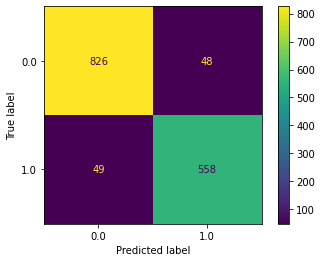

In [215]:
metrics.plot_confusion_matrix(clf, X_test, y_test, values_format = '')  
plt.show()

In [216]:
print(metrics.classification_report(y_true=y_test, y_pred = y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       874
         1.0       0.92      0.92      0.92       607

    accuracy                           0.93      1481
   macro avg       0.93      0.93      0.93      1481
weighted avg       0.93      0.93      0.93      1481



In [217]:
clf = svm.SVC(kernel = "poly", degree=2)
start_time = time.time()
res = np.mean(model_selection.cross_val_score(clf, w_angular, label, cv = 10))
results.append([res, "POLY ANG", time.time() - start_time])

In [218]:
res = model_selection.cross_validate(clf, w_angular, label, scoring = ["accuracy", "precision", "recall"], cv = 10)
print("10 WAY CROSS VALIDATION")
print('Mean accuracy =', np.mean(res['test_accuracy']))
print('Mean precision =', np.mean(res['test_precision']))
print('Mean recall =', np.mean(res['test_recall']))
print('Mean fit time =', np.mean(res['fit_time']))
print('Mean score time =', np.mean(res['score_time']))

10 WAY CROSS VALIDATION
Mean accuracy = 0.9275393732103087
Mean precision = 0.9005020798082803
Mean recall = 0.9263781461019029
Mean fit time = 0.33644216060638427
Mean score time = 0.0277878999710083


In [219]:
# SVM with an higher C parameter to make the classifier more stringent in the classification of outliers
clf = svm.SVC(kernel = "poly", degree=2, C = 100)
res = model_selection.cross_validate(clf, w_angular, label, scoring = ["accuracy", "precision", "recall"], cv = 10)
print("10 WAY CROSS VALIDATION")
print('Mean accuracy =', np.mean(res['test_accuracy']))
print('Mean precision =', np.mean(res['test_precision']))
print('Mean recall =', np.mean(res['test_recall']))
print('Mean fit time =', np.mean(res['fit_time']))
print('Mean score time =', np.mean(res['score_time']))

10 WAY CROSS VALIDATION
Mean accuracy = 0.9168484529112313
Mean precision = 0.893963557108852
Mean recall = 0.9042633517495396
Mean fit time = 0.6650341749191284
Mean score time = 0.019391512870788573


## RBF kernel

### With lenght information

In [220]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(w, label, test_size = 0.33, random_state = 2)
clf = svm.SVC(kernel = "rbf")

start_time = time.time()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Single model and single prediction time:", time.time() - start_time,"seconds")
print("Number of support vectors used =", clf.n_support_)

Single model and single prediction time: 0.44910287857055664 seconds
Number of support vectors used = [524 487]


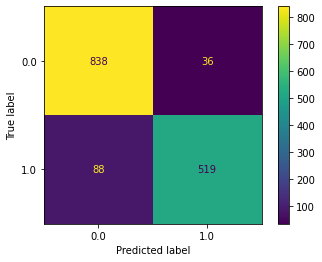

In [221]:
metrics.plot_confusion_matrix(clf, X_test, y_test, values_format = '')  
plt.show()

In [222]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       874
         1.0       0.94      0.86      0.89       607

    accuracy                           0.92      1481
   macro avg       0.92      0.91      0.91      1481
weighted avg       0.92      0.92      0.92      1481



In [223]:
clf = svm.SVC(kernel = "rbf")
start_time = time.time()
res = np.mean(model_selection.cross_val_score(clf, w, label, cv = 10))
results.append([res, "RBF", time.time() - start_time])

In [224]:
res = model_selection.cross_validate(clf, w, label, scoring = ["accuracy", "precision", "recall"], cv = 10)
print("10 WAY CROSS VALIDATION")
print('Mean accuracy =', np.mean(res['test_accuracy']))
print('Mean precision =', np.mean(res['test_precision']))
print('Mean recall =', np.mean(res['test_recall']))
print('Mean fit time =', np.mean(res['fit_time']))
print('Mean score time =', np.mean(res['score_time']))

10 WAY CROSS VALIDATION
Mean accuracy = 0.9159531100859054
Mean precision = 0.9125514689636514
Mean recall = 0.8776949048496011
Mean fit time = 0.5143482208251953
Mean score time = 0.05058653354644775


In [225]:
# SVM with an higher C parameter to make the classifier more stringent in the classification of outliers
clf = svm.SVC(kernel = "rbf", C = 100)
res = model_selection.cross_validate(clf, w, label, scoring = ["accuracy", "precision", "recall"], cv = 10)
print("10 WAY CROSS VALIDATION")
print('Mean accuracy =', np.mean(res['test_accuracy']))
print('Mean precision =', np.mean(res['test_precision']))
print('Mean recall =', np.mean(res['test_recall']))
print('Mean fit time =', np.mean(res['fit_time']))
print('Mean score time =', np.mean(res['score_time']))

10 WAY CROSS VALIDATION
Mean accuracy = 0.9273310730194082
Mean precision = 0.9188124819857947
Mean recall = 0.8998311847759363
Mean fit time = 0.4720395803451538
Mean score time = 0.03368203639984131


In [226]:
clf = svm.SVC(kernel = "rbf", C = 100)
clf.fit(X_train, y_train)
print("Number of support vectors used =", clf.n_support_)

Number of support vectors used = [299 303]


### With angular information only

In [227]:
#Model with angular informations
X_train, X_test, y_train, y_test = model_selection.train_test_split(w_angular, label, test_size = 0.33, random_state = 2)

In [228]:
clf = svm.SVC(kernel = "rbf")

start_time = time.time()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Single model and single prediction time:", time.time() - start_time,"seconds")
print("Number of support vectors used =", clf.n_support_)

Single model and single prediction time: 0.34418797492980957 seconds
Number of support vectors used = [381 348]


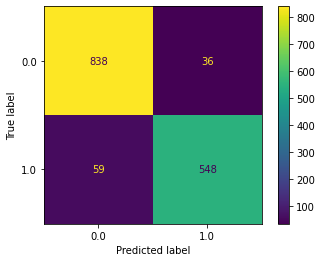

In [229]:
metrics.plot_confusion_matrix(clf, X_test, y_test, values_format = '')  
plt.show()

In [230]:
print(metrics.classification_report(y_true=y_test, y_pred = y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       874
         1.0       0.94      0.90      0.92       607

    accuracy                           0.94      1481
   macro avg       0.94      0.93      0.93      1481
weighted avg       0.94      0.94      0.94      1481



In [231]:
clf = svm.SVC(kernel = "rbf")
start_time = time.time()
res = np.mean(model_selection.cross_val_score(clf, w_angular, label, cv = 10))
results.append([res, "RBF ANG", time.time() - start_time])

In [232]:
res = model_selection.cross_validate(clf, w_angular, label, scoring = ["accuracy", "precision", "recall"], cv = 10)
print("10 WAY CROSS VALIDATION")
print('Mean accuracy =', np.mean(res['test_accuracy']))
print('Mean precision =', np.mean(res['test_precision']))
print('Mean recall =', np.mean(res['test_recall']))
print('Mean fit time =', np.mean(res['fit_time']))
print('Mean score time =', np.mean(res['score_time']))

10 WAY CROSS VALIDATION
Mean accuracy = 0.9264257874642062
Mean precision = 0.9105049565115804
Mean recall = 0.9097790055248618
Mean fit time = 0.39849565029144285
Mean score time = 0.03826682567596436


In [233]:
# SVM with an higher C parameter to make the classifier more stringent in the classification of outliers
clf = svm.SVC(kernel = "rbf", C = 100)
res = model_selection.cross_validate(clf, w_angular, label, scoring = ["accuracy", "precision", "recall"], cv = 10)
print("10 WAY CROSS VALIDATION")
print('Mean accuracy =', np.mean(res['test_accuracy']))
print('Mean precision =', np.mean(res['test_precision']))
print('Mean recall =', np.mean(res['test_recall']))
print('Mean fit time =', np.mean(res['fit_time']))
print('Mean score time =', np.mean(res['score_time']))

10 WAY CROSS VALIDATION
Mean accuracy = 0.9255448615972002
Mean precision = 0.9084295799790659
Mean recall = 0.908707796193984
Mean fit time = 0.4566605567932129
Mean score time = 0.030420875549316405


# Naive Bayes

### MyNB

In [234]:
class MyNB:
  def __init__(self):
    self.mu = []
    self.sigma2 = []
    self.alpha = []

  def fit(self, X, y):
    alpha = np.zeros(2)
    mu = np.zeros((2, len(X[0])))
    sigma2 = np.zeros((2, len(X[0])))
    X = np.asarray(X)
    y = np.asarray(y)

    for i in range(len(X)):
      alpha[ int(y[i]) ] += 1
    
    mu[0] = np.mean(X[ y == 0 ], axis = 0)
    mu[1] = np.mean(X[ y == 1 ], axis = 0)

    sigma2[0] = np.var(X[ y == 0 ], axis = 0)
    sigma2[1] = np.var(X[ y == 1 ], axis = 0)

    alpha = alpha / N

    sigma2 += max(max(sigma2[0]),max(sigma2[1])) * 1e-9

    self.mu = mu
    self.sigma2 = sigma2
    self.alpha = alpha

  def guassian(self, test_row, k):
    res = 1

    for i in range(len(test_row)):
      res *= ( ( 2*math.pi*self.sigma2[k][i] ) ** (-1/2) ) * math.exp(-( 1 / (2*self.sigma2[k][i]) ) * ( (  test_row[i] - self.mu[k][i]) ** 2 ) )
      #Note that a value greater than 1 is ok here, because it is a probability density rather than a probability

    return res

  def predict(self, X):
    y_pred = []

    for row in X:
      y_pred.append( int( ( self.guassian(row, 1) * self.alpha[1] ) >= ( self.guassian(row, 0) * self.alpha[0] ) ) )

    return y_pred

  def score(self, X, y):
    return metrics.accuracy_score(y, self.predict(X))

  def get_params(self, deep):
    return {}

In [235]:
from sklearn.utils import shuffle

#random permutation of data
X, y = shuffle(w, label, random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state = 2)

clf = MyNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

[[649 232]
 [ 24 576]]


In [236]:
clf = MyNB()
start_time = time.time()
res = np.mean(model_selection.cross_val_score(clf, w, label, cv = 10))
results.append([res, "NB", time.time() - start_time])

In [237]:
clf = MyNB()
res = model_selection.cross_validate(clf, X, y, scoring = ["accuracy", "precision", "recall"], cv = 10)
tot_time = 0
tot_time = sum(res['fit_time']) + sum(res['score_time'])
print("10 WAY CROSS VALIDATION")
print('Mean accuracy =', np.mean(res['test_accuracy']))
print('Mean precision =', np.mean(res['test_precision']))
print('Mean recall =', np.mean(res['test_recall']))
print('Mean fit time =', np.mean(res['fit_time']))
print('Mean score time =', np.mean(res['score_time']))

10 WAY CROSS VALIDATION
Mean accuracy = 0.829507536589246
Mean precision = 0.7162832511323506
Mean recall = 0.9550870023511797
Mean fit time = 0.00762326717376709
Mean score time = 0.18654520511627198


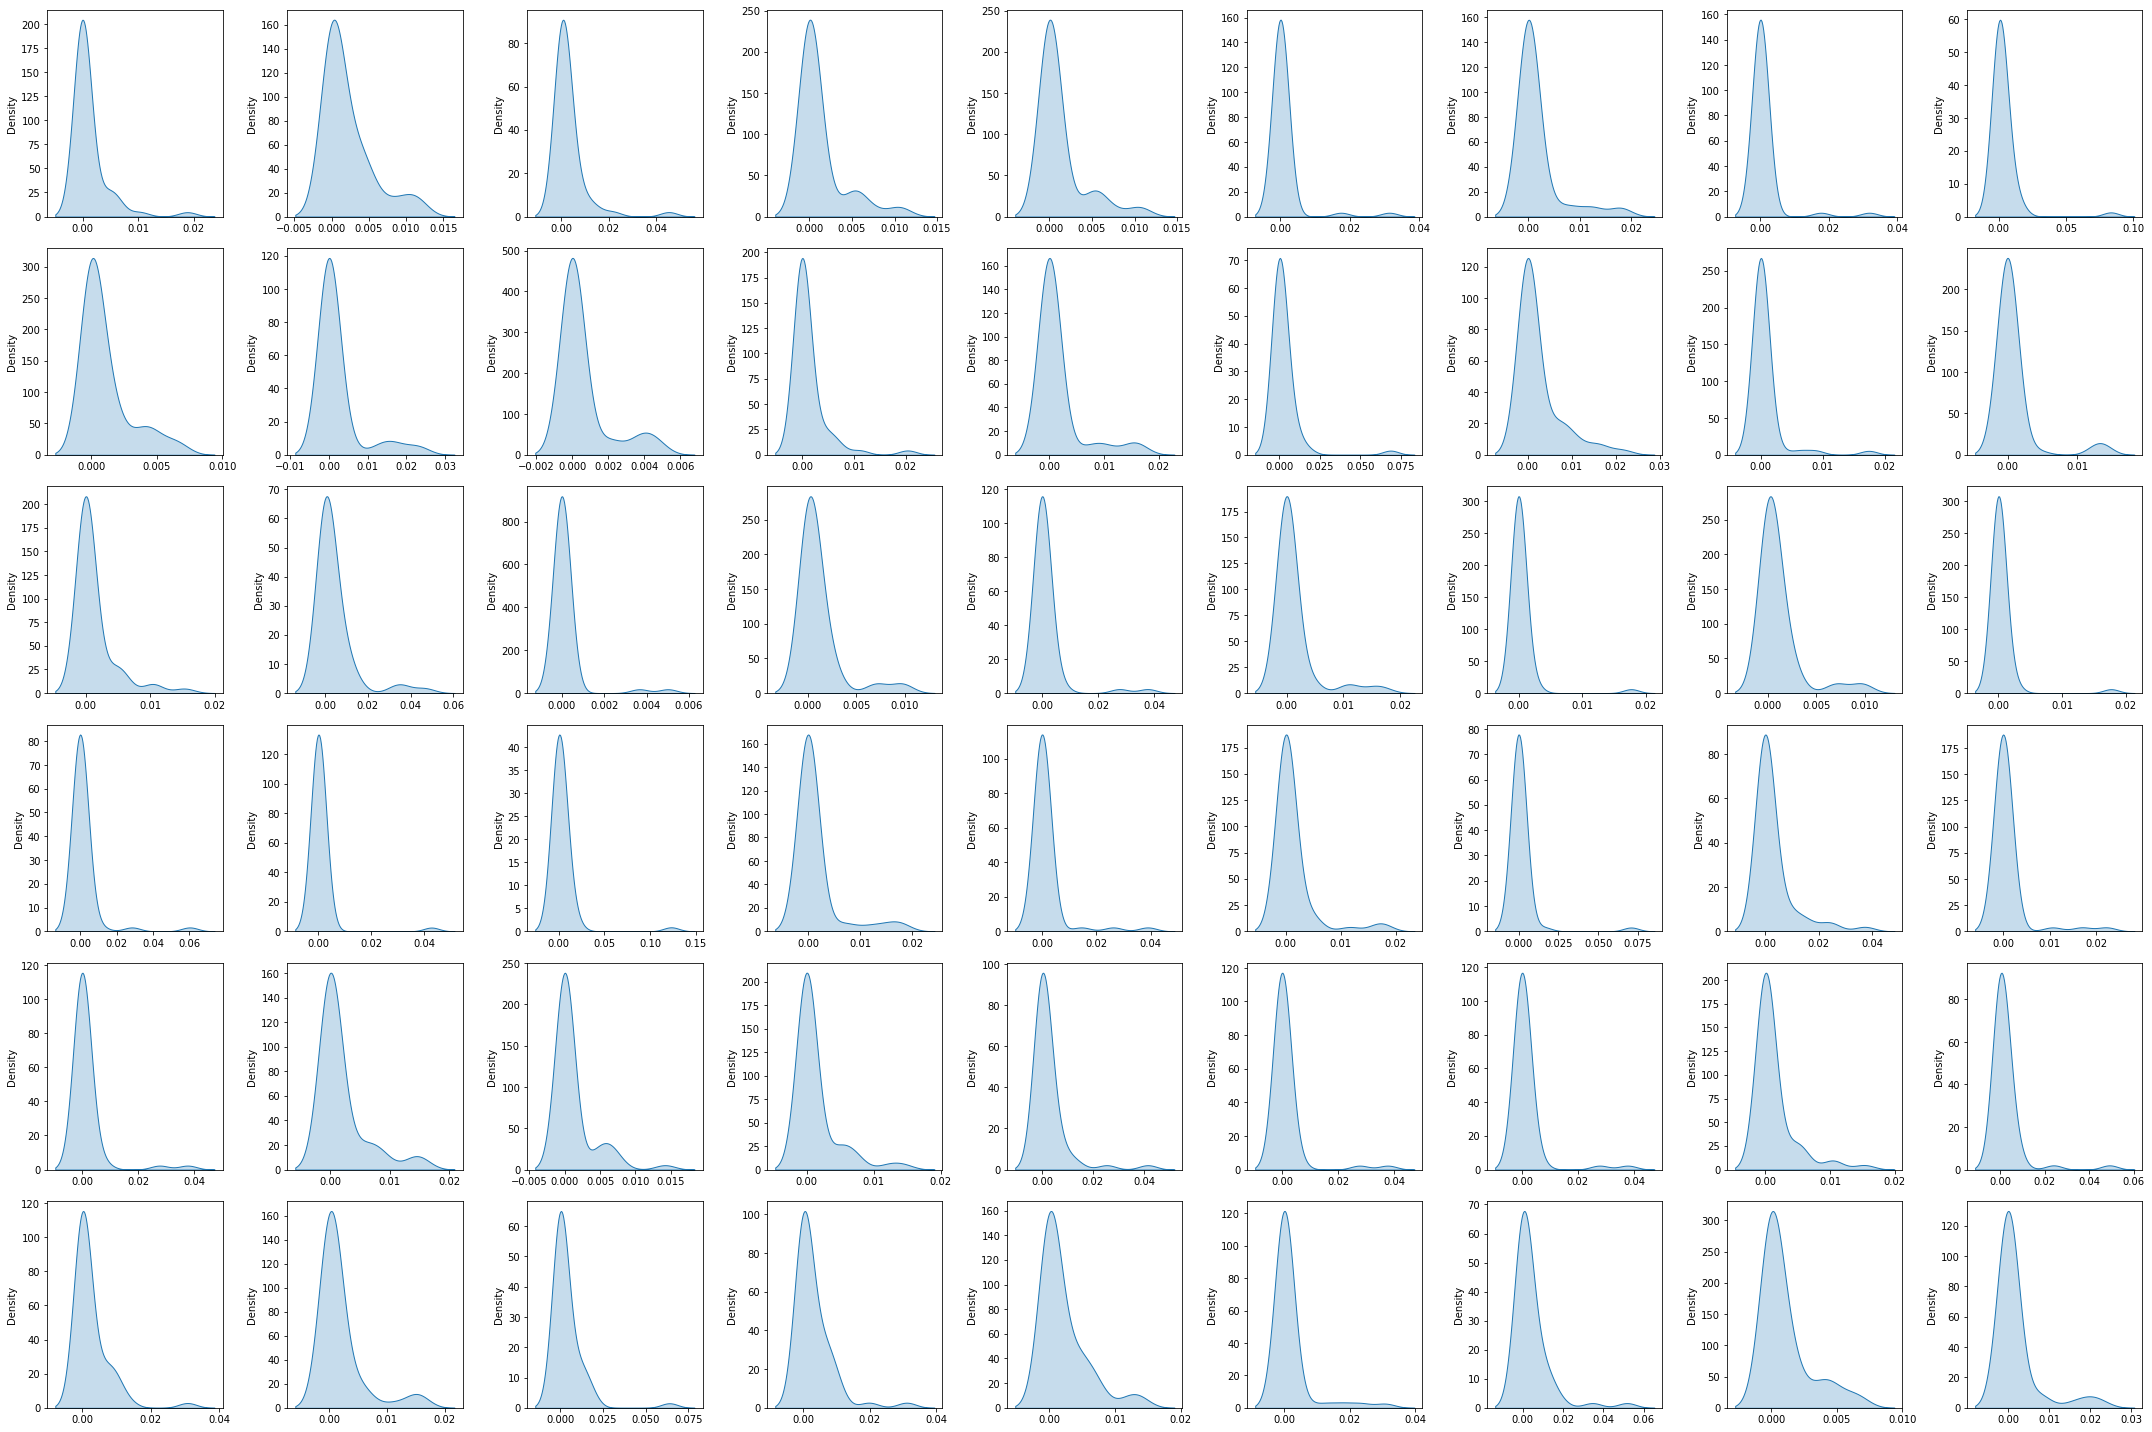

In [238]:
fig, axes = plt.subplots(6, 9, figsize=(30, 20))
for i in range(w[0].shape[0]):
    sb.kdeplot(w[i], bw_method = 0.5, fill = True, ax=axes[i//9, i%9])
    
fig.tight_layout()
plt.show()

### SKLEARN VERSION

In [239]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

start_time = time.time()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Single model and single prediction time:", time.time() - start_time,"seconds")

Single model and single prediction time: 0.007180929183959961 seconds


In [240]:
print(metrics.confusion_matrix(y_test, y_pred))

[[650 231]
 [ 23 577]]


In [241]:
print(metrics.classification_report(y_true=y_test, y_pred = y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84       881
         1.0       0.71      0.96      0.82       600

    accuracy                           0.83      1481
   macro avg       0.84      0.85      0.83      1481
weighted avg       0.86      0.83      0.83      1481



In [242]:
res = model_selection.cross_validate(clf, w, label, scoring = ["accuracy", "precision", "recall"], cv = 10)
tot_time = 0
tot_time = sum(res['fit_time']) + sum(res['score_time'])
print("10 WAY CROSS VALIDATION")
print('Mean accuracy =', np.mean(res['test_accuracy']))
print('Mean precision =', np.mean(res['test_precision']))
print('Mean recall =', np.mean(res['test_recall']))
print('Mean fit time =', np.mean(res['fit_time']))
print('Mean score time =', np.mean(res['score_time']))

10 WAY CROSS VALIDATION
Mean accuracy = 0.833454800349984
Mean precision = 0.7330656008442588
Mean recall = 0.9568078575813381
Mean fit time = 0.005012702941894531
Mean score time = 0.003916692733764648


# k-NN

In [243]:
from sklearn import neighbors

X_train, X_test, y_train, y_test = model_selection.train_test_split(w, label, test_size = 0.33, random_state = 2)
clf = neighbors.KNeighborsClassifier(5, metric = 'cosine')

start_time = time.time()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Single model and single prediction time:", time.time() - start_time,"seconds")

Single model and single prediction time: 0.1855461597442627 seconds


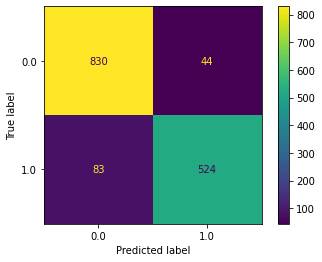

In [244]:
metrics.plot_confusion_matrix(clf, X_test, y_test, values_format = '')  
plt.show()

In [245]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       874
         1.0       0.92      0.86      0.89       607

    accuracy                           0.91      1481
   macro avg       0.92      0.91      0.91      1481
weighted avg       0.91      0.91      0.91      1481



In [246]:
clf = neighbors.KNeighborsClassifier(5, metric = 'cosine')

start_time = time.time()

res = np.mean(model_selection.cross_val_score(clf, w, label, cv = 10))
results.append([res, "KNN", time.time() - start_time])
print("10 way cross validation time:", time.time() - start_time,"seconds; Result =", res)

10 way cross validation time: 0.7995531558990479 seconds; Result = 0.910820672923958


In [247]:
res = model_selection.cross_validate(clf, w, label, scoring = ["accuracy", "precision", "recall"], cv = 10)
tot_time = 0
tot_time = sum(res['fit_time']) + sum(res['score_time'])
print("10 WAY CROSS VALIDATION")
print('Mean accuracy =', np.mean(res['test_accuracy']))
print('Mean precision =', np.mean(res['test_precision']))
print('Mean recall =', np.mean(res['test_recall']))
print('Mean fit time =', np.mean(res['fit_time']))
print('Mean score time =', np.mean(res['score_time']))

10 WAY CROSS VALIDATION
Mean accuracy = 0.910820672923958
Mean precision = 0.8906930137481608
Mean recall = 0.8920841006752609
Mean fit time = 0.0021436929702758787
Mean score time = 0.08178353309631348


# Results

In [248]:
x = []
y = []
t = []
for i in results:
    x.append(i[0])
    y.append(i[1])
    t.append(i[2])

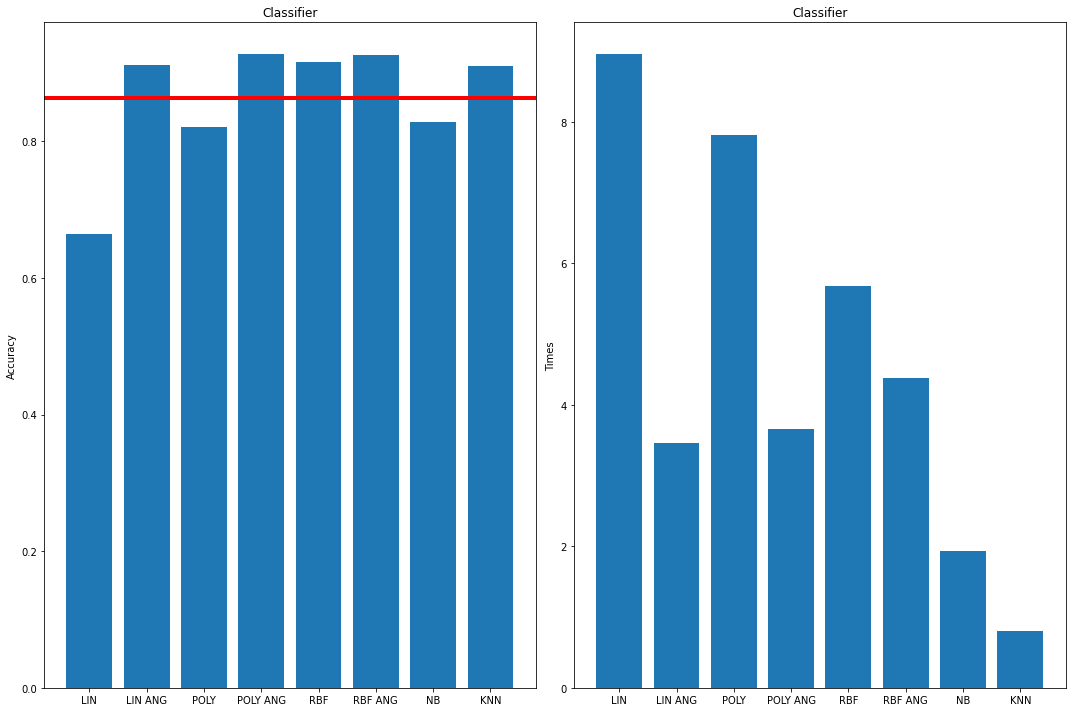

In [249]:
fig, ax = plt.subplots(1, 2,figsize=(15,10))
ax[0].bar(y, x)
ax[0].set_xticks(np.arange(0, len(y)), minor=False)
ax[1].bar(y, t)
ax[1].set_xticks(np.arange(0, len(y)), minor=False)
# ax[0].xticks(np.arange(0, len(y)), rotation = "vertical")
ax[0].set_title("Classifier")
ax[0].set_ylabel("Accuracy")
ax[1].set_title("Classifier")
ax[1].set_ylabel("Times")

ax[0].axhline(y = np.mean(x) , linewidth=4, color='r')

plt.tight_layout()
